# Complete Reference to Least Squares and Gradient Descent for Parameter Esimation

In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
import matplotlib.pyplot as plt
from matplotlib import interactive
interactive(True)

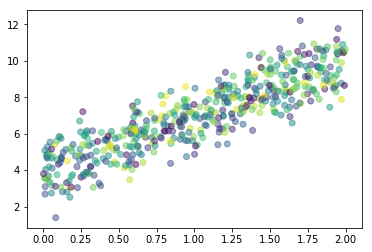

In [2]:
x = 2*np.random.rand(500,1)
y = 4+3*x + np.random.randn(500,1)
colors = np.random.rand(500,1)
plt.scatter(x,y, c=colors, alpha=0.5)
plt.show()

In [3]:
def solve_theta(x, y):
    #be sure to use matmul instead of np.dot() on higher dimensional matrices
    # when inverting to solve for theta
    # also can use np.linalg.solve(np.dot(x.T,x), np.dot(x.T, y))
    if x.shape[1] > x.shape[0]:
        x = x.T
    if y.shape[1] > y.shape[0]:
        y = y.T
    #print('dimension of y is {}'.format(y.shape))    
    ones = np.ones(len(x)).reshape(len(x), x.shape[1])
    x = np.hstack((ones,x))
    #print('dimension of x is {}'.format(x.shape))
    thetas = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
    #print('dimension of thetas is {}'.format(thetas.shape))
    return thetas

In [4]:
xran = resample(x,n_samples = 50)
yran = resample(y,n_samples = 50)
#solve_theta(x, y)
print(yran.max(), y.max())

12.21701098316611 12.21701098316611


In [5]:
#vectorized computation
thetas = solve_theta(x,y)
print('the thetas is {}'.format(thetas))
train = np.hstack((np.ones(len(x)).reshape(len(x), x.shape[1]),x))
vector_preds = np.dot(train,thetas)

the thetas is [[3.90106267]
 [3.04857409]]


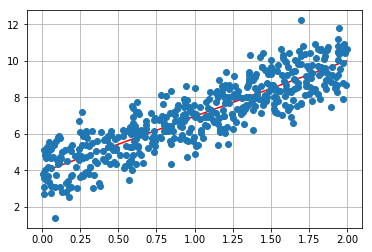

In [6]:
vv = np.linspace(0,max(x))
FF = thetas[0,0] + thetas[1,0]*vv
plt.plot(vv,FF, 'r', x[:,0], y, 'o')
plt.grid(True)
plt.show()

In [7]:
thetas = solve_theta(x,y)
beta0 = thetas[0]
beta1 = thetas[1]
sst, ssr = 0, 0 
pred = np.zeros(len(x))
for i in range(len(pred)):
    pred[i] = beta0 + beta1*x[i,0]
    ssr +=(pred[i] - y[i,0])**2
    sst +=(y[i,0] - y.mean())**2
preds = pred.reshape(len(pred),1)
rmse = np.sqrt(ssr/len(x))
r2 = 1 - (ssr/sst)
print('rmse is {} and r square is {}'.format(rmse, r2))

rmse is 0.9531793909434132 and r square is 0.7769871940892091


In [8]:
sum_square_error = np.linalg.norm(vector_preds - y)**2
rootmean = np.sqrt(sum_square_error/len(y))
print('rmse is {} and R^2 will be the same too'.format(rootmean))

rmse is 0.9531793909434139 and R^2 will be the same too


# Bootstrapped Parameters

- centered at 2.9 as expected

2.741 3.394


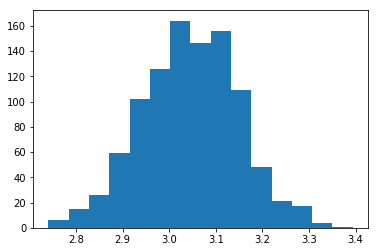

In [9]:
def boot(x,y,size,iters):
    betas = []
    dat = np.hstack((x,y))
    for i in range(iters):
        data = resample(dat, n_samples = size)
        xsamp,ysamp = data[:,0].reshape(len(data),1), data[:,1].reshape(len(data),1)
        betas.append(float(solve_theta(xsamp,ysamp)[1].round(3)))
    return betas
out = boot(x,y,250,1000)
print(min(out), max(out))
plt.hist(out, bins = 15)
plt.show()

# Now implementing Gradient Descent
- Note that gradient descent works on all problems, you just need to specifcy the cost function and the gradient (derivative)

In [14]:
def hypothesis(thetas, x):
    
    yhat = np.dot(x, thetas)
    
    return yhat


def cost(thetas, x , y):
    '''
    make sure the training data has the preappended ones vector
    '''
    m = len(y)
    cost = (/2)*np.sum(np.square(hypothesis(thetas, x ) - y))
    
    return cost

In [15]:
cost(thetas, train , y)

113568.86891490719

In [12]:
def gradient_descent(x,y,thetas,alpha, iters):
    '''
    x = training data with preappended ones
    y = our target/prediction vector
    thetas = initialize at something random, must have same number of rows as
    columns in x (ie the parameters need to be the same as number of cols)
    example: np.random.randn(2,1), where 2 is the number of cols (train.shape[1])
    alpha = step size
    iters = number of times we want this thing ran
    '''
    if x.shape[1] != thetas.shape[0]:
        return('error bruv, check your theta dimension')
    
    costhistory = np.zeros(iters)
    thetahistory = np.zeros((iters,len(thetas)))
    
    for i in range(iters):
        '''
        in general the derivative of the cost function is something like:
        sum of predictions minus actual,  multiplied by X transpose
        '''
        thetas = thetas - (1/len(y)) * alpha * (x.T.dot((hypothesis(thetas,x) - y)))
        
        thetahistory[i,:] = thetas.T
        costhistory[i] = cost(thetas, x , y)
        
    return (thetas, costhistory, thetahistory)
    

In [13]:
thetaz = np.random.randn(train.shape[1],1)
thetaz.shape

(2, 1)

In [14]:
results = gradient_descent(train,y,thetaz,.5, 200)
results[0]

array([[3.92819732],
       [3.09241339]])

# The results are identical to least squares

## The cost is minimized on about the 30th iteration

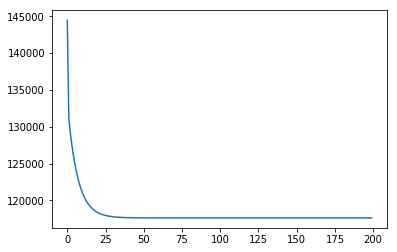

In [15]:
plt.plot(results[1])
plt.show()

## Our parameters correspondingly reach optimum at about 30 iterations

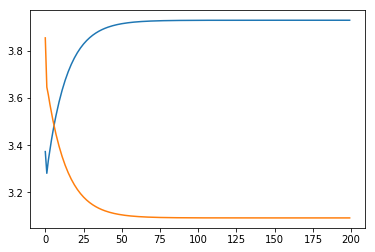

In [16]:
plt.plot(results[2])
plt.show()

# Stochastic Gradient Descent

- The results will be approximately the same as least squares and normal gradient descent 

In [41]:
def SGD(x,y,thetas,alpha, iters):
    '''
    The function is identical as before except we are performing gradient
    decent on a random subset of the data. This is useful for very large datasets
    thetas will be randoml generated, with num rows equal to num of cols in train
    
    Remember to prepappend the col vector of 1's to x prior to using the function!!!
    '''
    costhistory = np.zeros(iters)
    for i in range(iters):
        cost_ = 0.0
        for j in range(len(y)):
            rand = np.random.randint(0,len(y))
            # give me a random number, which will be used to subset my data
            xrand = x[:rand, :]
            yrand = y[:rand, :]
            
            thetas = thetas - (1/len(y)) * alpha *(xrand.T.dot((hypothesis(thetas, xrand) - yrand)))
            
            cost_ += cost(thetas, xrand, yrand)
        
        costhistory[i] = cost_
    
    return thetas, costhistory

In [42]:
out = SGD(train,y,thetaz,.5, 200)

The intercept is [3.97484942] and the parameter value is [3.08127166]


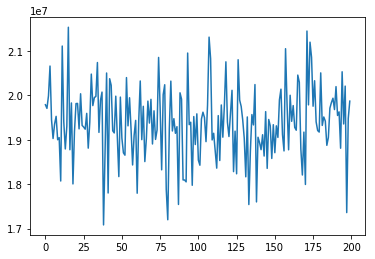

In [43]:
print('The intercept is {} and the parameter value is {}'.format(out[0][0], out[0][1]))
plt.plot(out[1])
plt.show()

# Mini-Batch Gradient Descent

In [20]:
def MBGD(x,y,thetas,alpha,iters,batch):
    '''
    For mini batch gradient descent you will do gradient descent on groups
    of observations called "batches"
    '''
    costhistory = np.zeros(iters)
    
    for i in range(iters):
        cost_ = 0
        #randomly select which indices you want for computation
        indices = np.random.permutation(len(y))
        x = x[indices]
        y = y[indices]
        
        for j in range(0,len(y),batch):
            xi = x[i:i+batch]
            yi = y[i:i+batch]
            thetas = thetas -(1/len(y))*alpha*( xi.T.dot((hypothesis(thetas, xi) - yi)))
            cost_ += cost(thetas, xi, yi)
            
        costhistory[i] = cost_
        
    return thetas, costhistory

In [34]:
mini = MBGD(train,y,thetaz,.5,50,500)

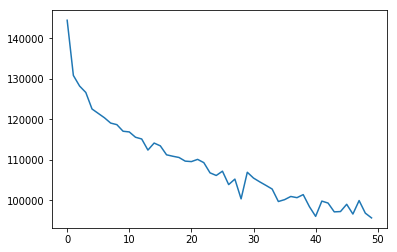

[[3.89734596]
 [3.10271201]]


In [35]:
plt.plot(mini[1])
plt.show()
print(mini[0])